# Environment

## Libraries

In [3]:
# Base libraries
import numpy as np
import pandas as pd

# Visualization libraries
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12,8)
import seaborn as sns
sns.set_palette('Set2')

# Sklearn models
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split

# Bonus
import warnings
warnings.filterwarnings('ignore')

## Data Extraction

In [64]:
df_aprilia = pd.read_csv('../data/dataset_aprilia.csv')

df_honda_CB = pd.read_csv('../data/dataset_honda_CB.csv')
df_honda_Forza = pd.read_csv('../data/dataset_honda_Forza.csv')

df_piaggio = pd.read_csv('../data/dataset_piaggio.csv')

df_yamaha = pd.read_csv('../data/dataset_yamaha.csv')

In [65]:
df_aprilia.select_dtypes(object).groupby(['Marca','Modelo','Versión']).agg('nunique')

Cilindrada  Potencia  Tipo carnet  \
Marca   Modelo Versión                                                 
APRILIA SR 50  SR 50 MOTARD                 1         1            3   
               SR 50 R                      1         1            3   
               SR 50 R GP REPLICA           1         1            3   
        SX     SX 125 ABS                   1         1            2   
        TUONO  TUONO 125 V4 ABS             1         1            2   

                                   Tipo seguro  Precio mínimo  
Marca   Modelo Versión                                         
APRILIA SR 50  SR 50 MOTARD                  3            121  
               SR 50 R                       3            124  
               SR 50 R GP REPLICA            3            143  
        SX     SX 125 ABS                    4             84  
        TUONO  TUONO 125 V4 ABS              4             84

In [5]:
df = pd.concat([df_honda_CB, df_honda_Forza,df_yamaha,df_piaggio,df_aprilia])
df.reset_index(inplace=True)
df.drop(['index'], axis='columns', inplace=True)
df

,Marca,Modelo,Cilindrada,Versión,Potencia,Año lanzamiento,Año matriculación,Edad actual,Código postal,Tipo carnet,Edad carnet,Tipo seguro,Precio mínimo
0,HONDA,CB 125,124 cc,CB 125 F,11 CV,2021,2021,19,8001,A1 (para conducir motos de hasta 125cc),19,Terceros sin asistencia en viaje,378€
1,HONDA,CB 125,124 cc,CB 125 F,11 CV,2021,2021,19,8001,A1 (para conducir motos de hasta 125cc),19,Terceros con asistencia en viaje,395€
2,HONDA,CB 125,124 cc,CB 125 F,11 CV,2021,2021,19,8001,A1 (para conducir motos de hasta 125cc),19,Terceros ampliado,711€
3,HONDA,CB 125,124 cc,CB 125 F,11 CV,2021,2021,19,8001,A1 (para conducir motos de hasta 125cc),19,Todo riesgo con franquicia,1.288€
4,HONDA,CB 125,124 cc,CB 125 F,11 CV,2021,2021,19,8001,"A2 (para motos de hasta 35kw y 0,2 kw/kg o mot...",19,Terceros sin asistencia en viaje,318€
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2768,APRILIA,TUONO,124 cc,TUONO 125 V4 ABS,14 CV,2020,2020,26,28001,"A2 (para motos de hasta 35kw y 0,2 kw/kg o mot...",23,Todo riesgo con franquicia,521€
2769,APRILIA,TUONO,124 cc,TUONO 125 V4 ABS,14 CV,2020,2020,26,28001,"A2 (para motos de hasta 35kw y 0,2 kw/kg o mot...",19,Terceros sin asistencia en viaje,121€
2770,APRILIA,TUONO,124 cc,TUONO 125 V4 ABS,14 CV,2020,2020,26,28001,"A2 (para motos de hasta 35kw y 0,2 kw/kg o mot...",19,Terceros con asistencia en viaje,138€
2771,APRILIA,TUONO,124 cc,TUONO 125 V4 ABS,14 CV,2020,2020,26,28001,"A2 (para motos de hasta 35kw y 0,2 kw/kg o mot...",19,Terceros ampliado,232€


# EDA (Exploratory Data Analysis)

## Format adjustment

In [6]:
cilindrada = []
for cil in df['Cilindrada']:
    cilindrada.append(int(cil.split(' ')[0]))
df['Cilindrada']=cilindrada

In [7]:
potencia = []
for pot in df['Potencia']:
    potencia.append(int(pot.split(' ')[0]))
df['Potencia']=potencia

In [8]:
precio = []
for pre in df['Precio mínimo']:
    precio.append(int(pre[0:len(pre)-1].replace('.','')))
df['Precio mínimo']=precio

In [9]:
postalcode = []
for cp in df['Código postal']:
    if cp==28001:
        postalcode.append('Madrid')
    elif cp==8001:
        postalcode.append('Barcelona')        
    else:
        print('error')
df['Código postal']=postalcode

## General view

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2773 entries, 0 to 2772
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Marca              2773 non-null   object
 1   Modelo             2773 non-null   object
 2   Cilindrada         2773 non-null   int64 
 3   Versión            2773 non-null   object
 4   Potencia           2773 non-null   int64 
 5   Año lanzamiento    2773 non-null   int64 
 6   Año matriculación  2773 non-null   int64 
 7   Edad actual        2773 non-null   int64 
 8   Código postal      2773 non-null   object
 9   Tipo carnet        2773 non-null   object
 10  Edad carnet        2773 non-null   int64 
 11  Tipo seguro        2773 non-null   object
 12  Precio mínimo      2773 non-null   int64 
dtypes: int64(7), object(6)
memory usage: 281.8+ KB


In [11]:
df.describe()

,Cilindrada,Potencia,Año lanzamiento,Año matriculación,Edad actual,Edad carnet,Precio mínimo
count,2773.000000,2773.000000,2773.000000,2773.000000,2773.000000,2773.000000,2773.000000
mean,88.736387,8.548143,2019.323116,2019.934728,23.474937,21.319510,539.090876
std,37.385112,5.138024,1.090178,1.051554,2.699307,2.623357,433.370935
min,50.000000,3.000000,2018.000000,2018.000000,19.000000,19.000000,81.000000
25%,50.000000,3.000000,2018.000000,2019.000000,22.000000,19.000000,211.000000
50%,124.000000,8.000000,2019.000000,2020.000000,22.000000,19.000000,372.000000
75%,125.000000,14.000000,2020.000000,2021.000000,26.000000,23.000000,784.000000
max,125.000000,15.000000,2021.000000,2021.000000,26.000000,26.000000,1919.000000


In [13]:
df.select_dtypes(object).groupby(['Marca','Modelo','Versión']).agg('nunique')

Código postal  Tipo carnet  \
Marca   Modelo      Versión                                               
APRILIA SR 50       SR 50 MOTARD                         2            3   
                    SR 50 R                              2            3   
                    SR 50 R GP REPLICA                   2            3   
        SX          SX 125 ABS                           2            2   
        TUONO       TUONO 125 V4 ABS                     2            2   
HONDA   CB 125      CB 125 F                             2            2   
                    CB 125 R ABS                         2            2   
        FORZA       FORZA 125 ABS                        2            2   
                    FORZA 125 ABS TOPBOX                 2            2   
PIAGGIO APE         APE 50 CROSS                         2            3   
                    APE 50 FURGON                        2            3   
                    APE 50 PLATAFORMA C                  2            3   
                    APE 50 PLATAFORMA L                  2            3   
        LIBERTY 125 LIBERTY 125 S I-GET ABS              2            2   
YAMAHA  DELIGHT     DELIGHT 125                          2            2   
        X-MAX       X-MAX 125                            2            2   
                    X-MAX 125 IRON MAX ABS               2            2   
                    X-MAX 125 TECH MAX                   2            2   
                    X-MAX 125 TECH MAX ABS               2            2   

                                             Tipo seguro  
Marca   Modelo      Versión                               
APRILIA SR 50       SR 50 MOTARD                       3  
                    SR 50 R                            3  
                    SR 50 R GP REPLICA                 3  
        SX          SX 125 ABS                         4  
        TUONO       TUONO 125 V4 ABS                   4  
HONDA   CB 125      CB 125 F                           4  
                    CB 125 R ABS                       4  
        FORZA       FORZA 125 ABS                      4  
                    FORZA 125 ABS TOPBOX               4  
PIAGGIO APE         APE 50 CROSS                       3  
                    APE 50 FURGON                      3  
                    APE 50 PLATAFORMA C                3  
                    APE 50 PLATAFORMA L                3  
        LIBERTY 125 LIBERTY 125 S I-GET ABS            4  
YAMAHA  DELIGHT     DELIGHT 125                        4  
        X-MAX       X-MAX 125                          4  
                    X-MAX 125 IRON MAX ABS             4  
                    X-MAX 125 TECH MAX                 4  
                    X-MAX 125 TECH MAX ABS             4

## Missing values

<AxesSubplot:>

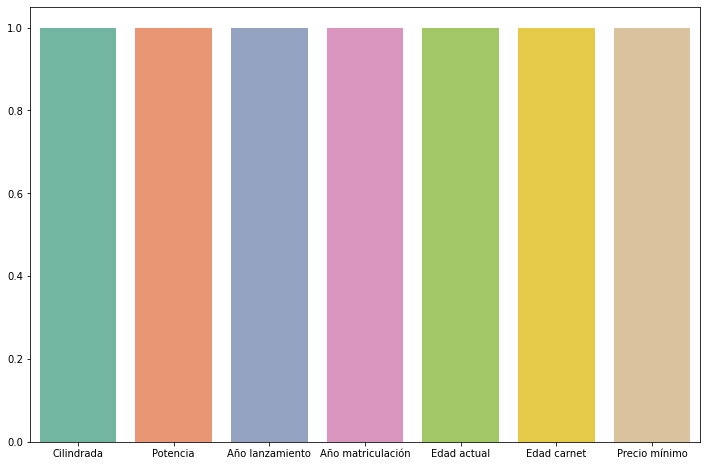

In [17]:
sns.barplot(x=df.select_dtypes(exclude=object).columns, y=df.select_dtypes(exclude=object).count()/len(df.select_dtypes(exclude=object)))

<AxesSubplot:>

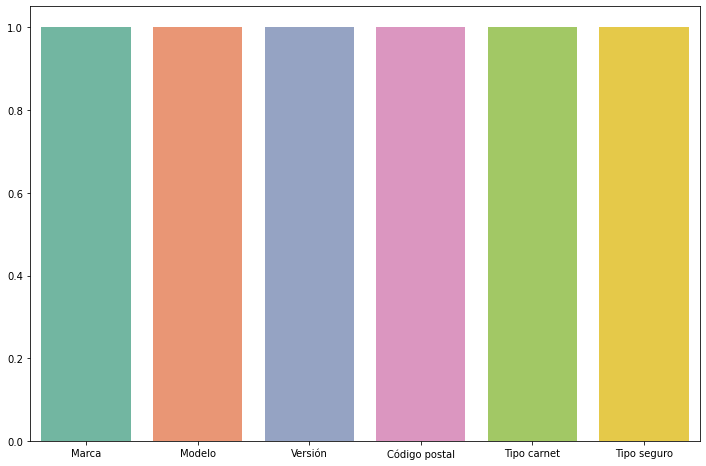

In [18]:
sns.barplot(x=df.select_dtypes(object).columns, y=df.select_dtypes(object).count()/len(df.select_dtypes(object)))

## Visualizations

### Minimum price per type of insurance based on cylinder capacity 

<AxesSubplot:xlabel='Tipo seguro', ylabel='Precio mínimo'>

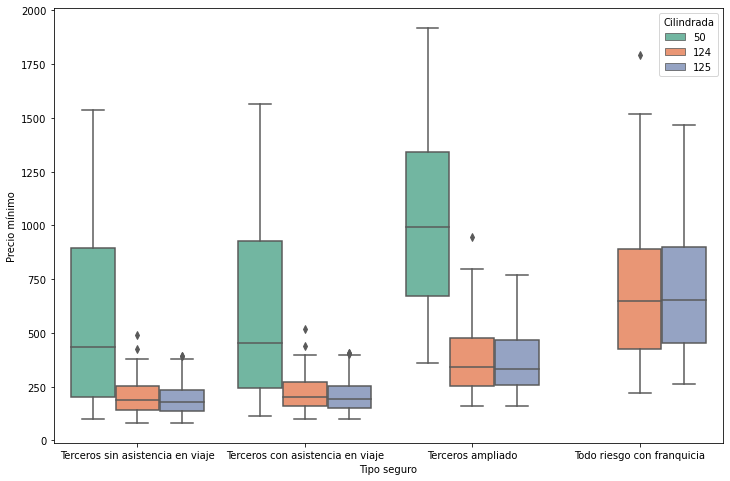

In [22]:
sns.boxplot(data=df,x='Tipo seguro',y='Precio mínimo', hue='Cilindrada')

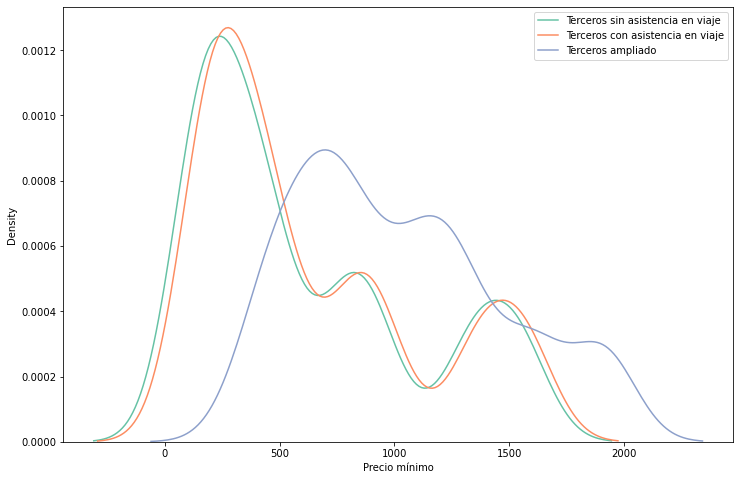

In [72]:
df_50 = df[df['Cilindrada']<=50].copy()

sns.distplot(df_50[df_50['Tipo seguro']=="Terceros sin asistencia en viaje"]['Precio mínimo'], hist=False, label="Terceros sin asistencia en viaje")
sns.distplot(df_50[df_50['Tipo seguro']=="Terceros con asistencia en viaje"]['Precio mínimo'], hist=False, label="Terceros con asistencia en viaje")
sns.distplot(df_50[df_50['Tipo seguro']=="Terceros ampliado"]['Precio mínimo'], hist=False, label="Terceros ampliado")
sns.distplot(df_50[df_50['Tipo seguro']=="Todo riesgo con franquicia"]['Precio mínimo'], hist=False, label="Todo riesgo con franquicia")
plt.legend()

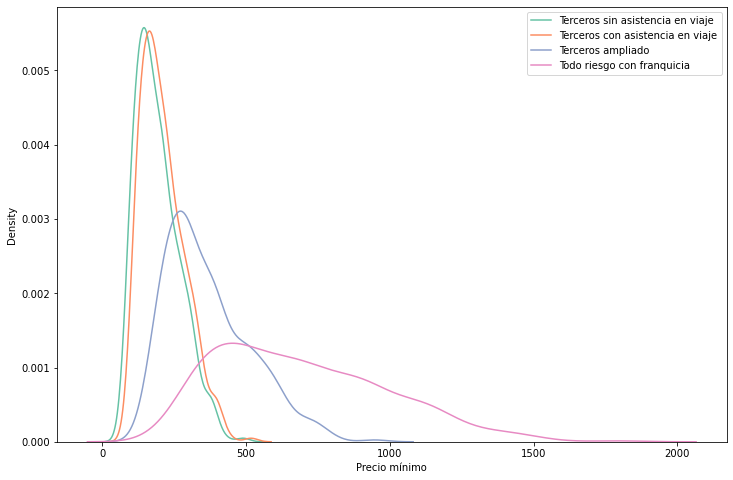

In [73]:
df_125 = df[df['Cilindrada']>50].copy()

sns.distplot(df_125[df_125['Tipo seguro']=="Terceros sin asistencia en viaje"]['Precio mínimo'], hist=False, label="Terceros sin asistencia en viaje")
sns.distplot(df_125[df_125['Tipo seguro']=="Terceros con asistencia en viaje"]['Precio mínimo'], hist=False, label="Terceros con asistencia en viaje")
sns.distplot(df_125[df_125['Tipo seguro']=="Terceros ampliado"]['Precio mínimo'], hist=False, label="Terceros ampliado")
sns.distplot(df_125[df_125['Tipo seguro']=="Todo riesgo con franquicia"]['Precio mínimo'], hist=False, label="Todo riesgo con franquicia")
plt.legend()

### Minimum price per type of insurance based on the bike registration year

<AxesSubplot:xlabel='Tipo seguro', ylabel='Precio mínimo'>

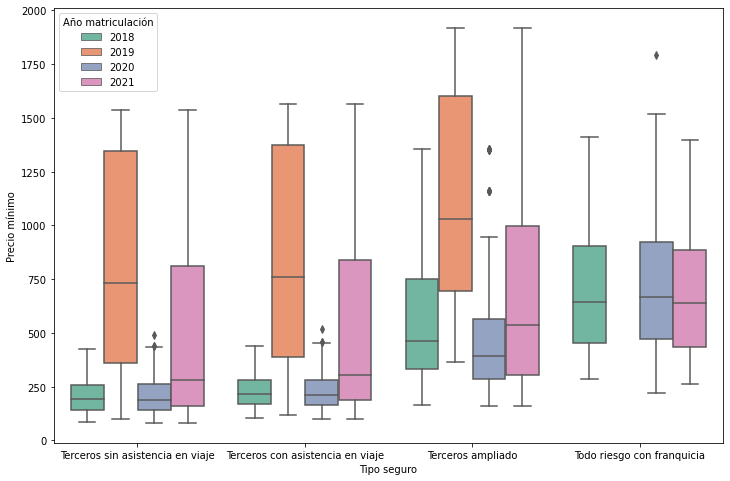

In [74]:
sns.boxplot(data=df,x='Tipo seguro',y='Precio mínimo', hue='Año matriculación')

<AxesSubplot:xlabel='Tipo seguro', ylabel='Precio mínimo'>

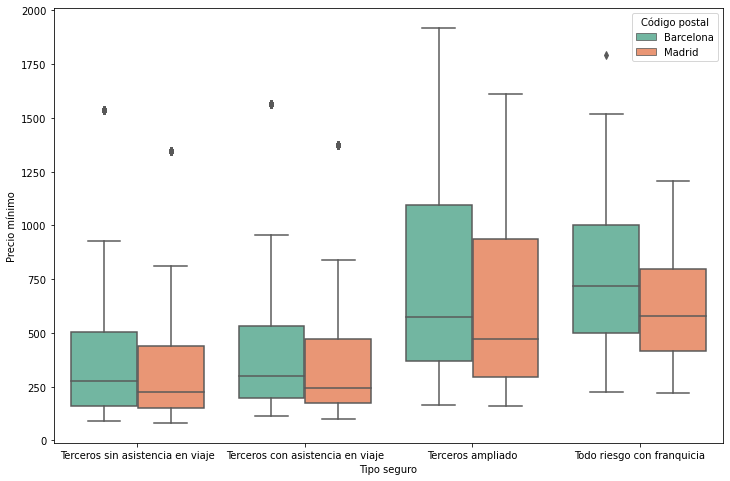

In [23]:
sns.boxplot(data=df,x='Tipo seguro',y='Precio mínimo', hue='Código postal')

<AxesSubplot:xlabel='Tipo seguro', ylabel='Precio mínimo'>

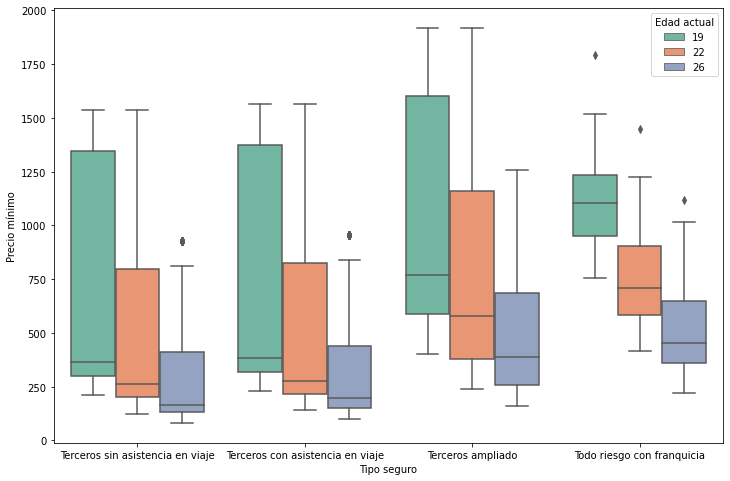

In [24]:
sns.boxplot(data=df,x='Tipo seguro',y='Precio mínimo', hue='Edad actual')

# Decision Tree Regressor Model

<AxesSubplot:>

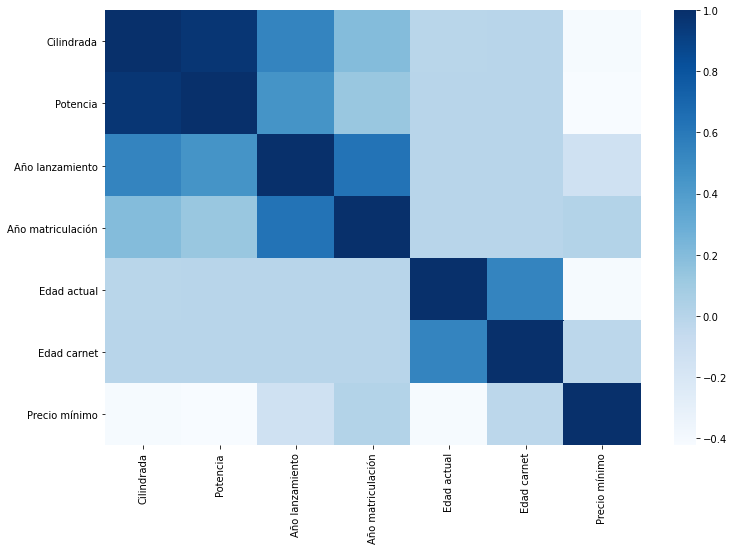

In [25]:
sns.heatmap(df.corr(), cmap='Blues')

## Functions

In [26]:
def df_X(df, insurance):
    
    df_model = df.copy()
    
    df_model['Código moto'] = df_model["Marca"] + " - " + df_model["Modelo"]
    df_model['Tipo carnet']=df_model['Tipo carnet'].apply(lambda carnet: 3 if carnet=='A2 (para motos de hasta 35kw y 0,2 kw/kg o motos limitadas)' else (2 if carnet=='A1 (para conducir motos de hasta 125cc)' else 1))
    df_model['Código postal']=df_model['Código postal'].apply(lambda cp: 0 if cp == 'Madrid' else (1 if cp == 'Barcelona' else 'Error'))
    df_model['Año lanzamiento']=df_model['Año lanzamiento'].apply(lambda a: 2021 - a)
    df_model['Año matriculación']=df_model['Año matriculación'].apply(lambda a: 2021 -a)
                                                          
    df_model = df_model[df_model['Tipo seguro']==insurance]
    
    df_mean = df_model[["Código moto","Precio mínimo"]].groupby("Código moto").mean("Precio mínimo")
    df_model = df_model.join(df_mean, on = "Código moto", rsuffix = "_código", how = "left")
    
    X = df_model[['Cilindrada','Potencia','Año lanzamiento','Año matriculación','Código postal','Tipo carnet','Edad actual','Edad carnet','Precio mínimo_código']]
    return X

In [27]:
def df_y(df, insurance):
    
    df_model = df.copy()
    df_model = df_model[df_model['Tipo seguro']==insurance]
    
    y = df_model['Precio mínimo']
    return y

## Terceros sin asistencia en viaje

In [28]:
X = df_X(df, 'Terceros sin asistencia en viaje')
X.head(5)

,Cilindrada,Potencia,Año lanzamiento,Año matriculación,Código postal,Tipo carnet,Edad actual,Edad carnet,Precio mínimo_código
0,124,11,0,0,1,2,19,19,192.83871
4,124,11,0,0,1,3,19,19,192.83871
8,124,11,0,0,0,2,19,19,192.83871
12,124,11,0,0,0,3,19,19,192.83871
16,124,11,0,0,1,2,22,22,192.83871


In [29]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 860 entries, 0 to 2769
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Cilindrada            860 non-null    int64  
 1   Potencia              860 non-null    int64  
 2   Año lanzamiento       860 non-null    int64  
 3   Año matriculación     860 non-null    int64  
 4   Código postal         860 non-null    int64  
 5   Tipo carnet           860 non-null    int64  
 6   Edad actual           860 non-null    int64  
 7   Edad carnet           860 non-null    int64  
 8   Precio mínimo_código  860 non-null    float64
dtypes: float64(1), int64(8)
memory usage: 67.2 KB


In [35]:
y = df_y(df, 'Terceros sin asistencia en viaje')

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state=42)

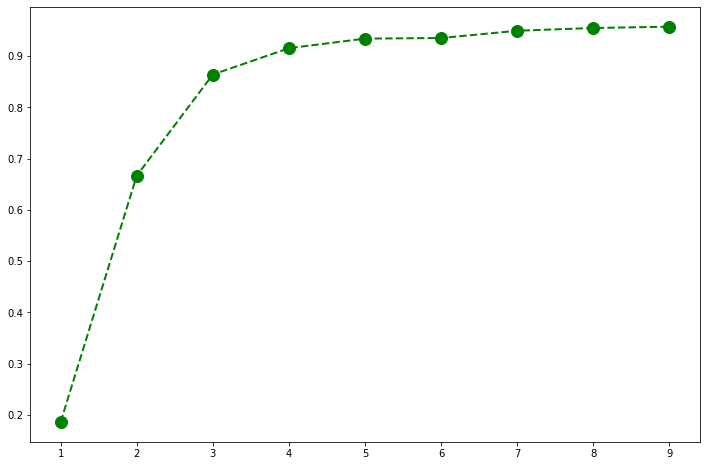

In [62]:
list_scores = []
list_mdepth = []

for i in range(1,len(X.columns)+1):    
    regressor = DecisionTreeRegressor(max_depth=i, random_state=42)
    model = regressor.fit(X_train, y_train)
    score = model.score(X_test, y_test)
    list_scores.append(score)
    list_mdepth.append(i)
    
plt.plot(list_mdepth, list_scores,color='green', marker='o', linestyle='dashed', linewidth=2, markersize=12)

In [63]:
regressor = DecisionTreeRegressor(max_depth=4, random_state=42)
model = regressor.fit(X_train, y_train)
model.score(X_test, y_test)

0.9155220283182852

In [39]:
feat_imp = pd.DataFrame(model.feature_importances_,index=X.columns,columns = ['feat_importance']).sort_values(['feat_importance'], ascending=False)
feat_imp[feat_imp['feat_importance']>0]

,feat_importance
Potencia,0.615321
Edad actual,0.304885
Edad carnet,0.074931
Código postal,0.004864


## Terceros con asistencia en viaje

In [40]:
X = df_X(df, 'Terceros con asistencia en viaje')
X.head(5)

,Cilindrada,Potencia,Año lanzamiento,Año matriculación,Código postal,Tipo carnet,Edad actual,Edad carnet,Precio mínimo_código
1,124,11,0,0,1,2,19,19,210.580645
5,124,11,0,0,1,3,19,19,210.580645
9,124,11,0,0,0,2,19,19,210.580645
13,124,11,0,0,0,3,19,19,210.580645
17,124,11,0,0,1,2,22,22,210.580645


In [41]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 860 entries, 1 to 2770
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Cilindrada            860 non-null    int64  
 1   Potencia              860 non-null    int64  
 2   Año lanzamiento       860 non-null    int64  
 3   Año matriculación     860 non-null    int64  
 4   Código postal         860 non-null    int64  
 5   Tipo carnet           860 non-null    int64  
 6   Edad actual           860 non-null    int64  
 7   Edad carnet           860 non-null    int64  
 8   Precio mínimo_código  860 non-null    float64
dtypes: float64(1), int64(8)
memory usage: 67.2 KB


In [42]:
y = df_y(df, 'Terceros con asistencia en viaje')

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state=42)

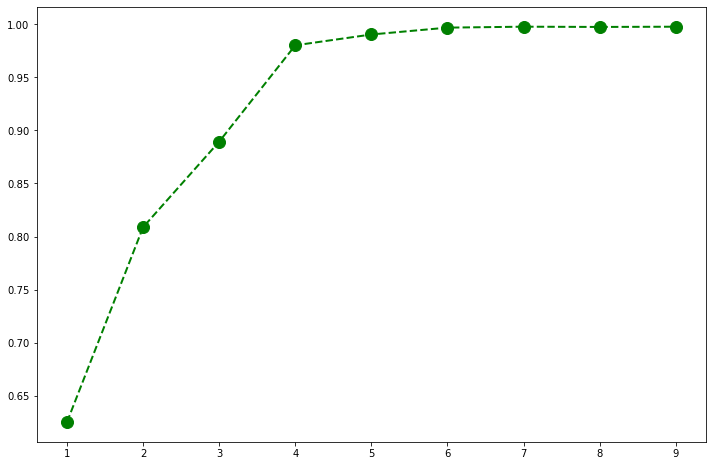

In [44]:
list_scores = []
list_mdepth = []

for i in range(1,len(X.columns)+1):    
    regressor = DecisionTreeRegressor(max_depth=i, random_state=42)
    model = regressor.fit(X_train, y_train)
    score = model.score(X_test, y_test)
    list_scores.append(score)
    list_mdepth.append(i)
    
plt.plot(list_mdepth, list_scores,color='green', marker='o', linestyle='dashed', linewidth=2, markersize=12)

In [45]:
regressor = DecisionTreeRegressor(max_depth=4, random_state=42)
model = regressor.fit(X_train, y_train)
model.score(X_test, y_test)

0.9802591821165635

In [46]:
feat_imp = pd.DataFrame(model.feature_importances_,index=X.columns,columns = ['feat_importance']).sort_values(['feat_importance'], ascending=False)
feat_imp[feat_imp['feat_importance']>0]

,feat_importance
Potencia,0.622245
Edad actual,0.298534
Edad carnet,0.074417
Código postal,0.004803


## Terceros ampliado

In [47]:
X = df_X(df, 'Terceros ampliado')
X.head(5)

,Cilindrada,Potencia,Año lanzamiento,Año matriculación,Código postal,Tipo carnet,Edad actual,Edad carnet,Precio mínimo_código
2,124,11,0,0,1,2,19,19,359.150538
6,124,11,0,0,1,3,19,19,359.150538
10,124,11,0,0,0,2,19,19,359.150538
14,124,11,0,0,0,3,19,19,359.150538
18,124,11,0,0,1,2,22,22,359.150538


In [48]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 694 entries, 2 to 2771
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Cilindrada            694 non-null    int64  
 1   Potencia              694 non-null    int64  
 2   Año lanzamiento       694 non-null    int64  
 3   Año matriculación     694 non-null    int64  
 4   Código postal         694 non-null    int64  
 5   Tipo carnet           694 non-null    int64  
 6   Edad actual           694 non-null    int64  
 7   Edad carnet           694 non-null    int64  
 8   Precio mínimo_código  694 non-null    float64
dtypes: float64(1), int64(8)
memory usage: 54.2 KB


In [49]:
y = df_y(df, 'Terceros ampliado')

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state=42)

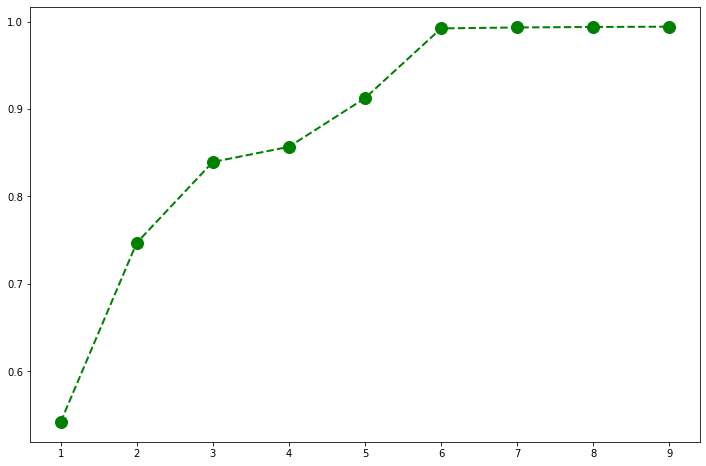

In [51]:
list_scores = []
list_mdepth = []

for i in range(1,len(X.columns)+1):    
    regressor = DecisionTreeRegressor(max_depth=i, random_state=42)
    model = regressor.fit(X_train, y_train)
    score = model.score(X_test, y_test)
    list_scores.append(score)
    list_mdepth.append(i)
    
plt.plot(list_mdepth, list_scores,color='green', marker='o', linestyle='dashed', linewidth=2, markersize=12)

In [52]:
regressor = DecisionTreeRegressor(max_depth=6, random_state=42)
model = regressor.fit(X_train, y_train)
model.score(X_test, y_test)

0.9924125206943759

In [53]:
feat_imp = pd.DataFrame(model.feature_importances_,index=X.columns,columns = ['feat_importance']).sort_values(['feat_importance'], ascending=False)
feat_imp[feat_imp['feat_importance']>0]

,feat_importance
Potencia,5.143857e-01
Edad actual,3.185061e-01
Edad carnet,7.701070e-02
Precio mínimo_código,5.727440e-02
Código postal,3.152379e-02
Tipo carnet,1.283517e-03
Año lanzamiento,1.574100e-05
Año matriculación,4.733909e-08


## Todo riesgo con franquicia

In [54]:
X = df_X(df, 'Todo riesgo con franquicia')
X.head(5)

,Cilindrada,Potencia,Año lanzamiento,Año matriculación,Código postal,Tipo carnet,Edad actual,Edad carnet,Precio mínimo_código
3,124,11,0,0,1,2,19,19,670.053763
7,124,11,0,0,1,3,19,19,670.053763
11,124,11,0,0,0,2,19,19,670.053763
15,124,11,0,0,0,3,19,19,670.053763
19,124,11,0,0,1,2,22,22,670.053763


In [55]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 359 entries, 3 to 2772
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Cilindrada            359 non-null    int64  
 1   Potencia              359 non-null    int64  
 2   Año lanzamiento       359 non-null    int64  
 3   Año matriculación     359 non-null    int64  
 4   Código postal         359 non-null    int64  
 5   Tipo carnet           359 non-null    int64  
 6   Edad actual           359 non-null    int64  
 7   Edad carnet           359 non-null    int64  
 8   Precio mínimo_código  359 non-null    float64
dtypes: float64(1), int64(8)
memory usage: 28.0 KB


In [56]:
y = df_y(df, 'Todo riesgo con franquicia')

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state=42)

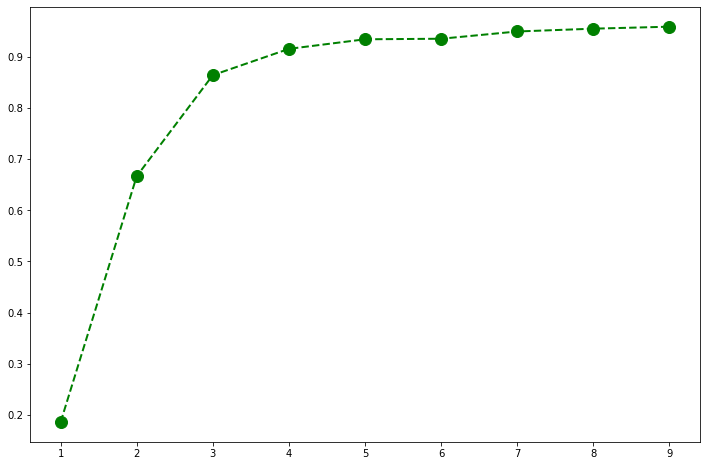

In [58]:
list_scores = []
list_mdepth = []

for i in range(1,len(X.columns)+1):    
    regressor = DecisionTreeRegressor(max_depth=i, random_state=42)
    model = regressor.fit(X_train, y_train)
    score = model.score(X_test, y_test)
    list_scores.append(score)
    list_mdepth.append(i)
    
plt.plot(list_mdepth, list_scores,color='green', marker='o', linestyle='dashed', linewidth=2, markersize=12)

In [60]:
regressor = DecisionTreeRegressor(max_depth=4, random_state=42)
model = regressor.fit(X_train, y_train)
model.score(X_test, y_test)

0.9155220283182852

In [61]:
feat_imp = pd.DataFrame(model.feature_importances_,index=X.columns,columns = ['feat_importance']).sort_values(['feat_importance'], ascending=False)
feat_imp[feat_imp['feat_importance']>0]

,feat_importance
Edad actual,0.638763
Edad carnet,0.255782
Código postal,0.078165
Tipo carnet,0.016461
Precio mínimo_código,0.010829
